In [1]:
%matplotlib inline

In [2]:
import fipy as fp

In [3]:
from matplotlibElPhFViewer import MatplotlibElPhFViewer
def viewElPhF(filename, L="3.2 nm", nx=1200):
    L = fp.Variable(L)
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx/L)

    xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")
    phi = fp.CellVariable(mesh=mesh, name=r"$\phi$")  
    interstitials = [
        fp.CellVariable(mesh=mesh, name="$e^-$")
    ]

    substitutionals = [
        fp.CellVariable(mesh=mesh, name="$M^+$"),
        fp.CellVariable(mesh=mesh, name="$A^-$")
    ]

    N = fp.CellVariable(mesh=mesh, name="$N$")
    
    components = interstitials + substitutionals + [N]
    
    for j in components:
        j.Y = fp.CellVariable(mesh=mesh, name=j.name)

    interstitials[0].z   = -1
    substitutionals[0].z = +2
    substitutionals[1].z = -2
    N.z                  = 0

                         
    values = fp.numerix.loadtxt(filename, skiprows=1, unpack=True)
    
    xi.setValue(values[1])
    phi.setValue(values[2])
    
    _start = 3
    for j, mu in zip(interstitials + substitutionals,
                     values[_start:_start+len(interstitials + substitutionals)]):
        j.setValue(mu)

    _start = 3 + len(interstitials + substitutionals)
    for j, Y in zip(components,
                     values[_start:_start+len(components)]):
        j.Y.setValue(Y)

    charge = fp.CellVariable(mesh=mesh, value=N.z)
    for i in interstitials + substitutionals:
        charge += i.z * i.Y

    viewer = MatplotlibElPhFViewer(phase=xi,
                           potential=phi,
                           components=[i.Y for i in components],
                           charge=charge,
                           potentials=[i - i[...,0] for i in interstitials + substitutionals],
                           limits={
                               'phasemax':1.,
                               'phasemin':0.,
                           })


## elphf0226.py

In [6]:
!python elphf0226.py --galvani_potential="0.0 V" --ncells=1200 --relaxation=0.8 --outer_sweeps=10 --output="0.0_V.tsv" 

L = 3.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -13.8154662599 -13.8154662599
$M^+$ -4.00857151748 -4.00857151748
$A^-$ -6.78092700755 -6.78092700755
dt 0.0732421875
0.0 1.45953280368 -0.00296330835955
0.0 0.612361431515 -0.00493852505938
0.0 0.541374782096 -0.00555655963638
0.0 0.530766541556 -0.00572782315669
0.0 0.528261380252 -0.00577172310619
0.0 0.527605095859 -0.00578311322057
0.0 0.527429007743 -0.00578608911657
0.0 0.527381464418 -0.00578687082014
0.0 0.527365112992 -0.00578713178429


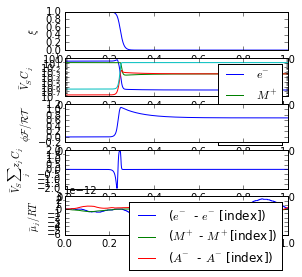

In [14]:
viewElPhF("0.0_V.tsv")

In [15]:
!python elphf0226.py --galvani_potential="0.5 V" --ncells=1200 --relaxation=0.8 --outer_sweeps=10 --output="0.5_V.tsv" 

L = 3.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ 5.65517931156 5.65517931156
$M^+$ -42.9498626605 -42.9498626605
$A^-$ 32.1603641355 32.1603641355
dt 0.0732421875
19.4706455715 0.136822231978 0.0934160864184
19.4706455715 -0.323209762193 0.0929805767067
19.4706455715 -0.384718378487 0.092302357785
19.4706455715 -0.394097999976 0.0921522196022
19.4706455715 -0.396027021061 0.092118391446
19.4706455715 -0.396458231543 0.0921107139634
19.4706455715 -0.39655624373 0.0921089900181
19.4706455715 -0.396578466815 0.0921086212747
19.4706455715 -0.396583418412 0.0921085581975
19.4706455715 -0.396584462102 0.0921085617418


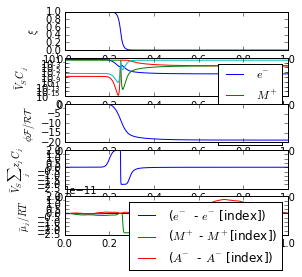

In [16]:
viewElPhF("0.5_V.tsv")

In [17]:
!python elphf0226.py --galvani_potential="-0.1 V" --ncells=1200 --relaxation=0.8 --outer_sweeps=10 --output="-0.1_V.tsv" 

L = 3.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -17.7095953742 -17.7095953742
$M^+$ 3.77968671112 3.77968671112
$A^-$ -14.5691852362 -14.5691852362
dt 0.0732421875
-3.8941291143 1.39267792761 -0.02764017843
-3.8941291143 0.559766029752 -0.0261639642302
-3.8941291143 0.489463316734 -0.0261552809963
-3.8941291143 0.475257477006 -0.0260596988502
-3.8941291143 0.471782861547 -0.0260357971641
-3.8941291143 0.470688237558 -0.0260236556225
-3.8941291143 0.470363637766 -0.0260196979989
-3.8941291143 0.470259788996 -0.0260181858248
-3.8941291143 0.470227432662 -0.0260176760595
-3.8941291143 0.470217048274 -0.0260174973899


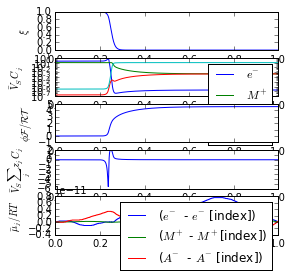

In [18]:
viewElPhF("-0.1_V.tsv")

Negative Galvani potentials do not converge well. Prone to negative electron concentration, as a result of negative $Y_m$

In [19]:
!python elphf0226.py --galvani_potential="-0.2 V" --ncells=1200 --relaxation=0.8 --outer_sweeps=10 --output="-0.2_V.tsv" 

L = 3.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -21.6037244886 -21.6037244886
$M^+$ 11.5679449397 11.5679449397
$A^-$ -22.3574434648 -22.3574434648
dt 0.0732421875
-7.7882582286 1.17901975488 -0.0586742840926
-7.7882582286 0.534547662721 -0.0345793459804
-7.7882582286 0.243407145993 -0.0412325708394
-7.7882582286 0.215933359653 -0.0492376309343
-7.7882582286 0.288592485178 -0.0407863512617
-7.7882582286 0.204731802415 -0.048835187382
-7.7882582286 0.237155311796 -0.0534676289416
-7.7882582286 0.307349583425 -0.0536448860992
-7.7882582286 0.271625116795 -0.048772465718
-7.7882582286 0.242815431581 -0.0508040879099


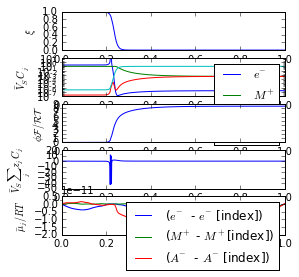

In [20]:
viewElPhF("-0.2_V.tsv")

Restart from previous solution at different Galvani potential does not result in "correct" equilibrium. Stabilizes at something with non-uniform electrochemical potentials. Possibly because equations are not well-coupled?

In [21]:
!python elphf0226.py --galvani_potential="-0.2 V" --ncells=1200 --relaxation=0.8 --outer_sweeps=10 --output="-0.2_Vb.tsv" --restart="0.0_V.tsv" 

L = 3.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -21.6037244886 -21.6037244886
$M^+$ 11.5679449397 11.5679449397
$A^-$ -22.3574434648 -22.3574434648
dt 0.0732421875
-7.7882582286 0.514142322507 -0.0493422702498
-7.7882582286 0.476266693105 -0.0191724100742
-7.7882582286 0.474455014125 -0.0211037645707
-7.7882582286 0.471256640525 -0.0224781968418
-7.7882582286 0.468279960218 -0.0237815993813
-7.7882582286 0.467055420321 -0.0246211029322
-7.7882582286 0.465573490401 -0.0253594284407
-7.7882582286 0.463972555068 -0.0260162440083
-7.7882582286 0.462295607716 -0.0265982153975
-7.7882582286 0.460734915917 -0.0271062200113


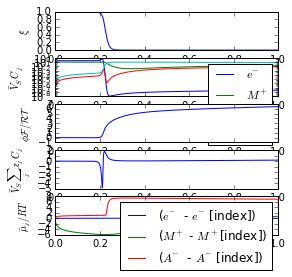

In [22]:
viewElPhF("-0.2_Vb.tsv")

In [5]:
"{0} {1} {2}".format(1.23, 3.14, 5)

'1.23 3.14 5'

In [12]:
!python elphf0226.py params.json

{u'galvani_potential': u'0 V', u'relaxation': 1.0, u'concentration': u'0.25 mol/l', u'outer_sweeps': 10, u'ncells': 120}
L = 3.2 nm
barrier 145.295286758
0.018 l/mol
Traceback (most recent call last):
  File "elphf0226.py", line 169, in <module>
    YM = (Vs * params["concentration"]).inBaseUnits()
  File "/data/ame2/fipy/fipy/variables/variable.py", line 275, in inBaseUnits
    value = self.value
  File "/data/ame2/fipy/fipy/variables/variable.py", line 512, in _getValue
    value = self._calcValue()
  File "/data/ame2/fipy/fipy/variables/operatorVariable.py", line 72, in _calcValue
    return self._calcValue_()
  File "/data/ame2/fipy/fipy/variables/binaryOperatorVariable.py", line 81, in _calcValue_
    return self.op(self.var[0].value, val1)
  File "/data/ame2/fipy/fipy/variables/variable.py", line 1105, in <lambda>
    return self._BinaryOperatorVariable(lambda a,b: a*b, other)
  File "/data/ame2/fipy/fipy/tools/dimensions/physicalField.py", line 382, in __mul__
    return self.__

In [4]:
%%bash

smt configure --executable=python
smt configure --labelgenerator=uuid
smt configure --on-changed=store-diff
smt configure --addlabel=parameters


Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly


In [2]:
!mkdir Data

mkdir: cannot create directory ‘Data’: File exists


In [3]:
!ls

0.0_V.tsv  elphf0226.py		     matplotlibElPhFViewer.pyc	params.json
Data	   matplotlibElPhFViewer.py  notes.ipynb		test.txt


In [7]:
!smt run --main=elphf0226.py params.json

Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
L = 0.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -13.8154662599 -13.8154662599
$M^+$ -4.00857151748 -4.00857151748
$A^-$ -6.78092700755 -6.78092700755
dt 18.75
0.0 12.3490736097 0.136109939986
0.0 10.0694676771 0.152441858059
0.0 9.55151171216 0.138678784783
0.0 9.27872387553 0.12596389781
0.0 9.0943202062 0.116036336175
0.0 8.95890366306 0.10850793993
0.0 8.85436104817 0.102916215126
0.0 8.77078747164 0.0988594132714
0.0 8.64396552773 0.0943117284487
Record label for this run: 'ce503af2e3b1'
Data keys are [test.txt(a9591dbf41feaf5484966b5d3e18bdce3bb156e5 [2016-07-07 09:48:57]), output.tsv(358b925e217234d7360ba721e6e98a2ccd82a74a [2016-07-07 09:49:04])]


In [11]:
for galvani in fp.numerix.linspace(0,0.5,2):
    galvanistring="{0} V".format(galvani)
    !smt run --main=elphf0226.py params.json galvani_potential="$galvani V"

Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
L = 0.2 nm
barrier 145.295286758
$e^-$ 1.99986486829e-06 1.99999308898
$M^+$ 0.0045 0.999996732016
$A^-$ 0.00449900006757 1.87524045318e-07
$N$ 0.991000999932 3.08045960254e-06
$m$ 1.00000199986 2.99999308898
deltaV -0.693033314543
$e^-$ -13.8154662599 -13.8154662599
$M^+$ -4.00857151748 -4.00857151748
$A^-$ -6.78092700755 -6.78092700755
dt 18.75
0.0 12.3490736097 0.136109939986
0.0 10.0694676771 0.152441858059
0.0 9.55151171216 0.138678784783
0.0 9.27872387553 0.12596389781
0.0 9.0943202062 0.116036336175
0.0 8.95890366306 0.10850793993
0.0 8.85436104817 0.102916215126
0.0 8.77078747164 0.0988594132714
0.0 8.64396552773 0.0943117284487
Record label for this run: '9f5e858fbfba'
Data keys are [test.txt(a9591dbf41feaf5484966b5d3e18bdce3bb156e5 [2016-07-07 10:28:25]), output.tsv(358b925e217234d7360ba721e6e98a2ccd82a74a [2016-07-07 10:28:32])]
Multi

In [ ]:
for galvani in fp.numerix.linspace(0,0.5,100):
    galvanistring="{0} V".format(galvani)
    !smt run --main=elphf0226.py params.json galvani_potential="$galvani V" ncells=1200 concentration="1.00 mol/l"

Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
L = 0.2 nm
barrier 145.295286758
$e^-$ 9.99929569675e-07 1.99998200311
$M^+$ 0.018 0.999994002517
$A^-$ 0.0179995000352 3.00096023745e-06
$N$ 0.964000499965 2.99652229725e-06
$m$ 1.00000099993 2.99998200311
deltaV 0.000113883086873
$e^-$ -13.8154681076 -13.8154681076
$M^+$ -3.98094782152 -3.98094782152
$A^-$ -3.98052006538 -3.98052006538
dt 18.75
0.0 12.4590035534 0.158860690131
0.0 10.2536001745 0.175339457815
0.0 9.76571214301 0.160456419206
0.0 9.51575278269 0.145195160722
0.0 9.35093254852 0.131984299133
0.0 9.23266290869 0.120789330679
0.0 9.14383672961 0.111283276794
0.0 9.07490639644 0.103155085573
0.0 8.97544918148 0.0900599754228
Record label for this run: 'f6f9f3823807'
Data keys are [test.txt(448161d6fb38a672736e08732aa9a9bee9f5125c [2016-07-07 14:45:58]), output.tsv(8da89196816c40b313fde5ea2d348feac0d13467 [2016-07-07 14:46:06])]
Mul

In [4]:
import json
import pandas

!smt export
with open(".smt/records_export.json") as ff:
    data = json.load(ff)
    
df = pandas.DataFrame(data)

In [5]:
df[["label","outcome","parameters"]]

,label,outcome,parameters
0,752d482fd147,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
1,859540b7dc58,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
2,461063187bf1,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
3,d92a9ab18f85,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
4,4f16adc0864f,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
5,d1560657d882,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
6,510fe4fa84be,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
7,3688033e3d9a,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
8,c2dc256dd747,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
9,4791473e2a24,,"{u'content': u'{ ""concentration"": ""0.25 mo..."


In [13]:
df.keys()

Index([u'datastore', u'dependencies', u'diff', u'duration', u'executable',
       u'input_data', u'input_datastore', u'label', u'launch_mode',
       u'main_file', u'outcome', u'output_data', u'parameters', u'platforms',
       u'reason', u'repeats', u'repository', u'script_arguments',
       u'stdout_stderr', u'tags', u'timestamp', u'user', u'version'],
      dtype='object')

In [ ]:
!ls Data

In [16]:
!ls Data/ce503af2e3b1/

output.tsv  test.txt


In [18]:
!cat Data/ce503af2e3b1/test.txt

0.0 8.7019717058 0.0960640164327


In [9]:
for r in df[["parameters"]].iterrows():
    print r[1]["parameters"]

{u'content': u'{\n    "concentration": "0.25 mol/l", \n    "galvani_potential": 0.0505050505051, \n    "ncells": 120, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "752d482fd147"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.25 mol/l", \n    "galvani_potential": 0.0454545454545, \n    "ncells": 120, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "859540b7dc58"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.25 mol/l", \n    "galvani_potential": 0.040404040404, \n    "ncells": 120, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "461063187bf1"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentration": "0.25 mol/l", \n    "galvani_potential": 0.0353535353535, \n    "ncells": 120, \n    "outer_sweeps": 10, \n    "relaxation": 1.0, \n    "sumatra_label": "d92a9ab18f85"\n}', u'type': u'JSONParameterSet'}
{u'content': u'{\n    "concentrat